In [163]:
import pandas as pd
import re
import numpy as np

import pickle

import seaborn as sns

import matplotlib.pyplot as plt

from collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import UnigramTagger, pos_tag
from nltk import bigrams, ngrams
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText, TfidfModel
from gensim import corpora
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, f1_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jean-\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv', sep=",")

In [26]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [27]:
def tokenize(x):
    try :
        return word_tokenize(x)
    except :
        return None

In [28]:
tokenised_cat = df['Review'].apply(tokenize)

In [29]:
tokenised_review=[[x.lower() for x in el] for el in tokenised_cat]

In [30]:
review_wo_specials = [[x for x in el if re.match('[a-z]+', str(x))] for el in tokenised_review]

In [31]:
review_wo_specials = [[x for x in el if re.sub('[^a-z]+'," ", str(x))] for el in review_wo_specials]

In [85]:
print(review_wo_specials[0][-10:])

['walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'having', 'pay', 'parking', 'night']


In [32]:
all_stopwords = stopwords.words('english')
review_wo_stopwords=[[x for x in el if x not in all_stopwords] for el in review_wo_specials]

In [86]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
lemmatizer = WordNetLemmatizer()
lemmetized_review = [[lemmatizer.lemmatize(str(word)) for word in el] for el in review_wo_stopwords]

In [92]:
print(lemmetized_review[0][20:40])

['quick', 'easy', 'little', 'disappointed', 'non-existent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillow', 'soundproof', 'like']


In [34]:
len(lemmetized_review)

20491

# Unsupervised Modeling

## Learning

### Models

In [168]:
tfidf_vectorizer = TfidfVectorizer()
texts = [" ".join(text) for text in lemmetized_review]
tfidf = tfidf_vectorizer.fit_transform(texts).toarray()

In [37]:
word2vec = Word2Vec(lemmetized_review, min_count=1)
fasttext = FastText(lemmetized_review)

In [38]:
print(word2vec.wv.most_similar("fabulous"))
print(fasttext.wv.most_similar("fabulous"))

[('fantastic', 0.9116843342781067), ('wonderful', 0.902914822101593), ('brilliant', 0.8700248003005981), ('terrific', 0.8643771409988403), ('superb', 0.8595442175865173), ('amazing', 0.8498950600624084), ('incredible', 0.8394690752029419), ('delightful', 0.8040367364883423), ('lovely', 0.8021750450134277), ('fab', 0.7873853445053101)]
[('fabulous-', 0.981891930103302), ('fabolous', 0.9385514855384827), ('fantastic', 0.9281737804412842), ('fabulously', 0.8906665444374084), ('wonderful', 0.8796770572662354), ('marvelous', 0.877926230430603), ('fantastique', 0.8742770552635193), ('wonderful.we', 0.873291552066803), ('wonderfull', 0.869075357913971), ('marvellous', 0.8647759556770325)]


In [110]:
def vectorize(review_list, model):

    features = []

    for tokens in review_list:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [111]:
vectorized_docs_word2vec = vectorize(lemmetized_review, model=word2vec)
print(len(vectorized_docs_word2vec), len(vectorized_docs_word2vec[0]))
vectorized_docs_fasttext = vectorize(lemmetized_review, model=fasttext)
print(len(vectorized_docs_fasttext), len(vectorized_docs_fasttext[0]))

20491 100
20491 100


In [41]:
vectorized_docs_word2vec[0]

array([ 0.19279401,  0.09162515, -0.62917554,  0.5445212 , -0.32612565,
       -0.43818027, -0.8274994 ,  0.845652  , -0.8257454 , -0.750909  ,
       -0.18253084, -0.3460257 ,  0.07353865,  0.21185836,  0.57852876,
       -0.3408513 ,  0.06066511,  0.00500932, -0.52063334, -0.48238787,
        0.11591438,  0.21050152,  0.66519964,  0.02300915,  0.55905807,
        0.14542069, -0.5279934 ,  0.7523235 , -0.43574238,  0.22215123,
        0.92339784,  0.01689621,  0.01337066, -0.72180974, -0.01553743,
        0.55492926,  0.00634497,  0.2071331 , -0.06478844, -0.42525226,
        0.00250088, -0.04364934, -0.4669341 , -0.01313222, -0.23108311,
       -0.35694695, -0.20162705, -0.11545137, -0.07026424, -0.10012201,
        0.7932707 , -1.1144253 , -0.41123527, -0.782314  ,  0.18530756,
       -0.04779223, -0.27481267, -0.22347823, -0.4080344 ,  0.62242115,
        0.042044  , -0.2437171 , -0.01068737,  0.06556976, -0.79464257,
        0.03365227,  0.2691592 , -0.02602516, -0.07212662,  1.68

## KMEANS

In [166]:
kmeans_word2vec = KMeans(n_clusters=2).fit(vectorized_docs_word2vec)
kmeans_fasttext = KMeans(n_clusters=2).fit(vectorized_docs_fasttext)
kmeans_tfidf = KMeans(n_clusters=2).fit(tfidf)

In [43]:
test = df[['Review', 'Rating']]

In [130]:
test['clusterW2V'] = kmeans_word2vec.labels_
test['clusterFT'] = kmeans_fasttext.labels_
test['clusterTFIDF'] = kmeans_tfidf.labels_

In [131]:
test.head()

,Review,Rating,clusterW2V,clusterFT,ax_1_W2V,ax_2_W2V,ax_1_FT,ax_2_FT,clusterTFIDF
0,nice hotel expensive parking got good deal sta...,4,1,0,0.121403,0.941661,-0.543236,1.126648,0
1,ok nothing special charge diamond member hilto...,2,0,1,-0.859108,1.074494,0.557860,1.343273,0
2,nice rooms not 4* experience hotel monaco seat...,3,0,1,-0.802197,1.430144,0.457294,1.911987,0
3,"unique, great stay, wonderful time hotel monac...",5,1,0,0.319797,0.282053,-0.374205,0.359281,0
4,"great stay great stay, went seahawk game aweso...",5,0,1,-0.888446,0.063274,1.057654,0.066654,0


In [132]:
dfW2V = pd.DataFrame(test.groupby(['clusterW2V', 'Rating']).size())
dfFT = pd.DataFrame(test.groupby(['clusterFT', 'Rating']).size())
dfTFIDF= pd.DataFrame(test.groupby(['clusterTFIDF', 'Rating']).size())

In [47]:
dfW2V.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))

In [48]:
dfFT.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

In [133]:
dfTFIDF.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

<AxesSubplot: title={'center': 'positive'}>

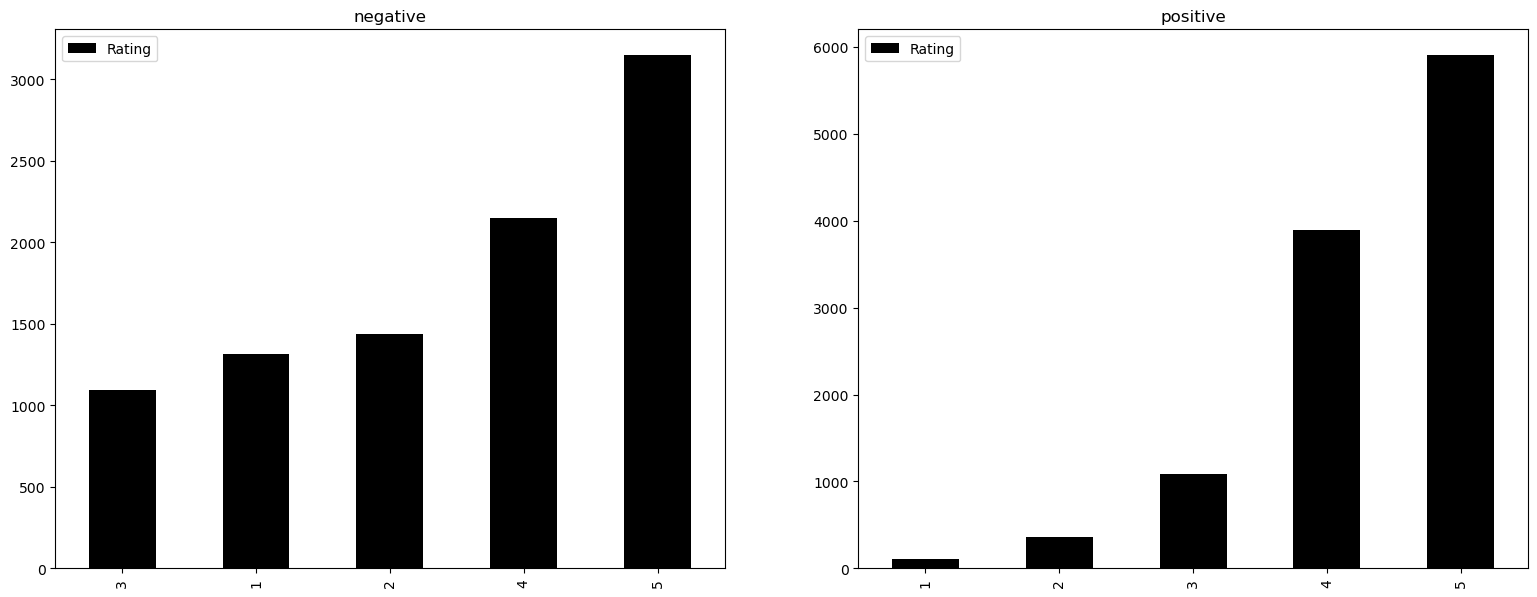

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(test[test['clusterW2V']==0]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[0],title='negative',figsize=(19,7))
pd.DataFrame(test[test['clusterW2V']==1]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[1],title='positive',figsize=(19,7))

<AxesSubplot: title={'center': 'positive'}>

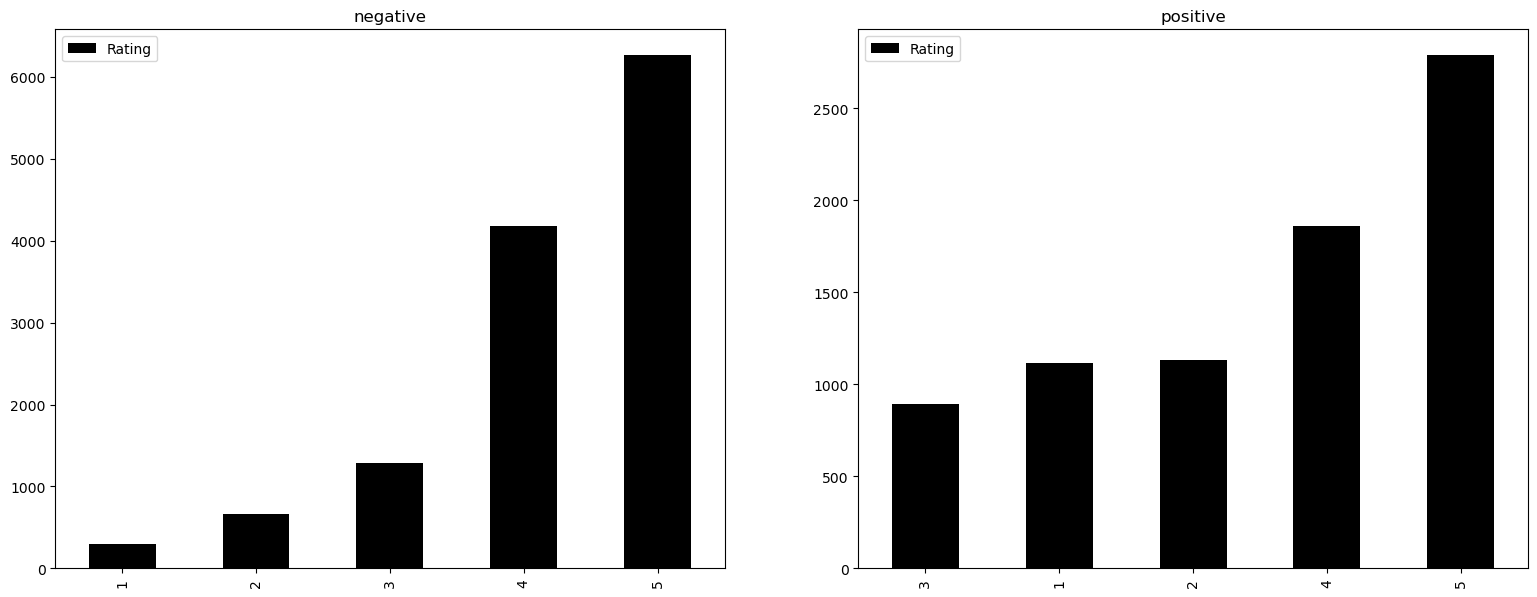

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(test[test['clusterFT']==0]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[0],title='negative',figsize=(19,7))
pd.DataFrame(test[test['clusterFT']==1]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[1],title='positive',figsize=(19,7))

<AxesSubplot: title={'center': 'positive'}>

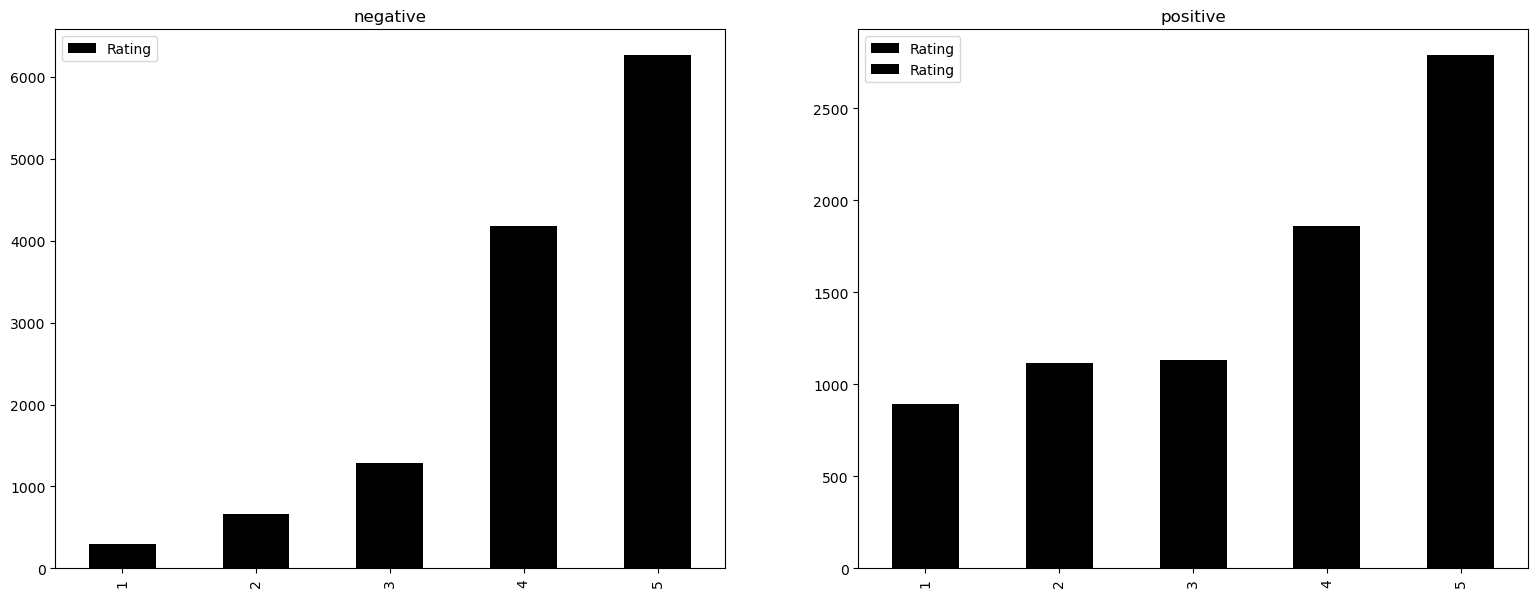

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=2)
pd.DataFrame(test[test['clusterFT']==0]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[0],title='negative',figsize=(19,7))
pd.DataFrame(test[test['clusterFT']==1]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[1],title='positive',figsize=(19,7))
pd.DataFrame(test[test['clusterTFIDF']==1]['Rating'].value_counts(ascending=True)).plot(kind='bar',color='black',ax=axes[1],title='positive',figsize=(19,7))

In [135]:
pca = PCA(2)
resW2V = pca.fit_transform(vectorized_docs_word2vec)
resFT = pca.fit_transform(vectorized_docs_fasttext)
resTFIDF = pca.fit_transform(tfidf)

In [136]:
ax_1_W2V = [el[0] for el in resW2V]
ax_2_W2V = [el[1] for el in resW2V]
test['ax_1_W2V'] = ax_1_W2V
test['ax_2_W2V'] = ax_2_W2V
ax_1_FT = [el[0] for el in resFT]
ax_2_FT = [el[1] for el in resFT]
test['ax_1_FT'] = ax_1_FT
test['ax_2_FT'] = ax_2_FT
ax_1_TFIDF = [el[0] for el in resTFIDF]
ax_2_TFIDF = [el[1] for el in resTFIDF]
test['ax_1_TFIDF'] = ax_1_TFIDF
test['ax_2_TFIDF'] = ax_2_TFIDF

In [137]:
test.head()

,Review,Rating,clusterW2V,clusterFT,ax_1_W2V,ax_2_W2V,ax_1_FT,ax_2_FT,clusterTFIDF,ax_1_TFIDF,ax_2_TFIDF
0,nice hotel expensive parking got good deal sta...,4,1,0,0.121403,0.941661,-0.543236,1.126648,0,-0.044428,-0.081787
1,ok nothing special charge diamond member hilto...,2,0,1,-0.859108,1.074494,0.557860,1.343273,0,-0.005322,-0.150511
2,nice rooms not 4* experience hotel monaco seat...,3,0,1,-0.802197,1.430144,0.457294,1.911987,0,-0.005505,-0.142198
3,"unique, great stay, wonderful time hotel monac...",5,1,0,0.319797,0.282053,-0.374205,0.359281,0,-0.062360,0.040401
4,"great stay great stay, went seahawk game aweso...",5,0,1,-0.888446,0.063274,1.057654,0.066654,0,0.020073,-0.048375


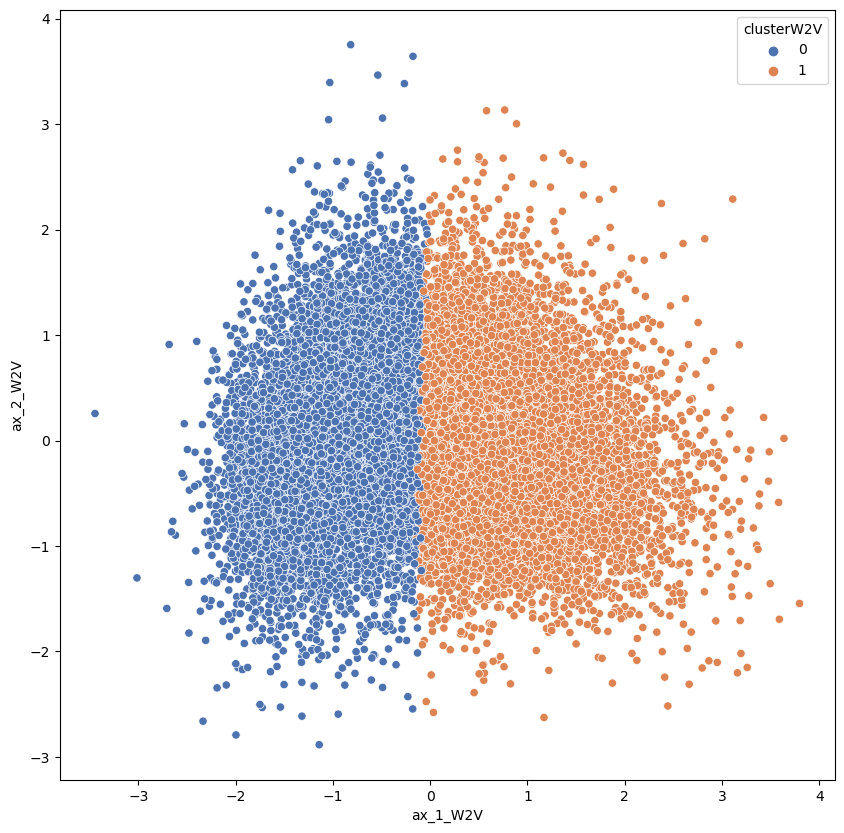

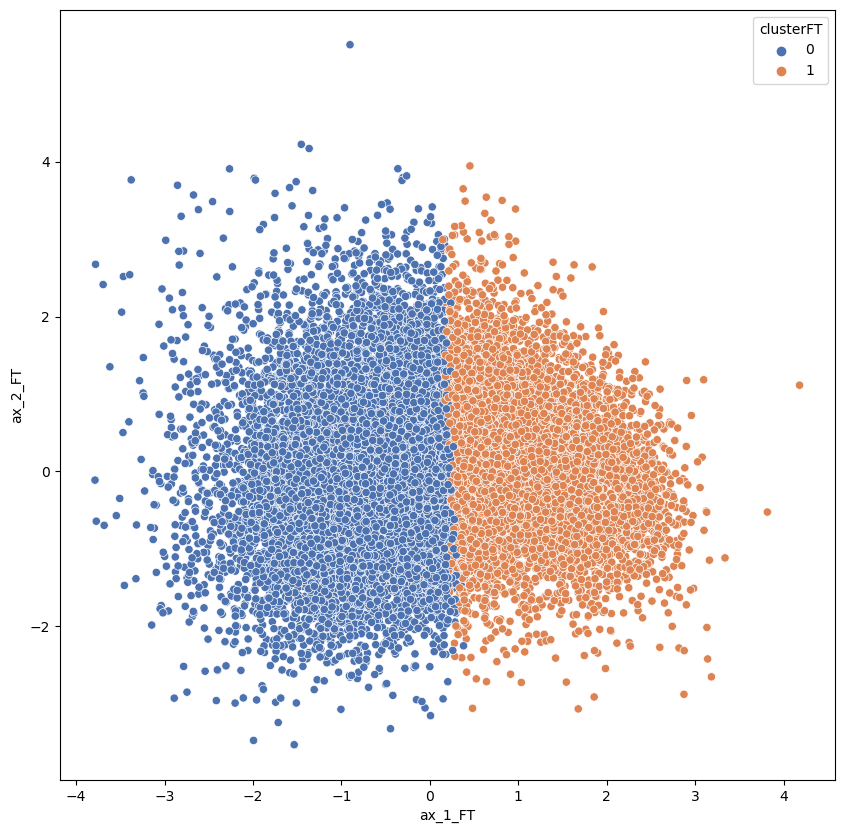

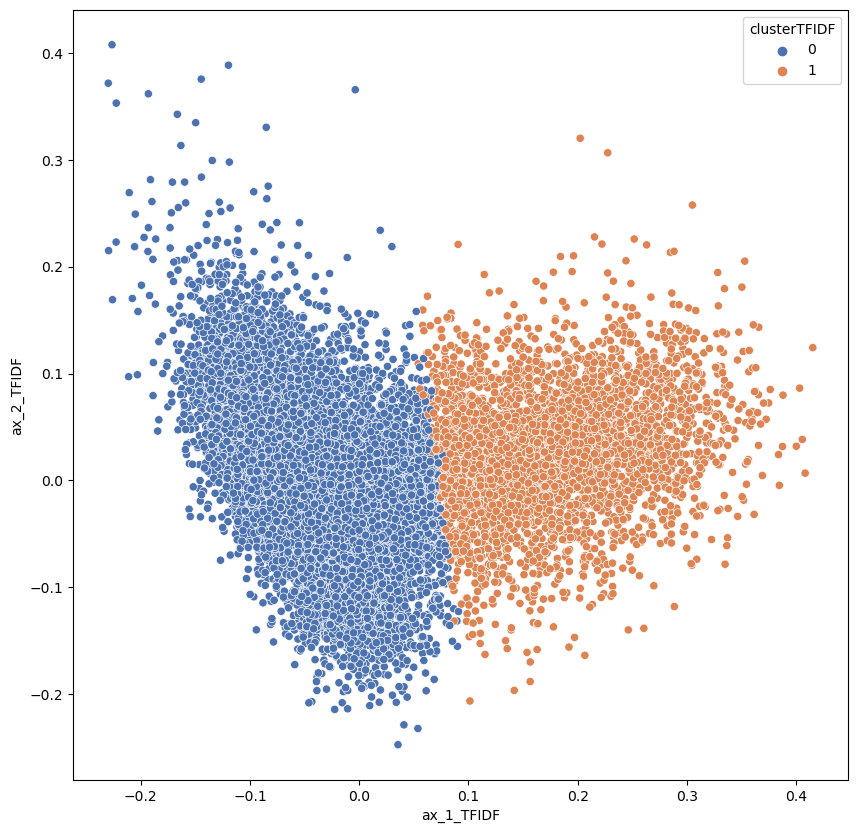

In [138]:
gig = plt.figure(figsize=(10,10))

sns.scatterplot(x='ax_1_W2V', y="ax_2_W2V", hue='clusterW2V', palette='deep', data=test)
plt.show()

gig2 = plt.figure(figsize=(10,10))

sns.scatterplot(x='ax_1_FT', y="ax_2_FT", hue='clusterFT', palette='deep', data=test)
plt.show()

gig3 = plt.figure(figsize=(10,10))

sns.scatterplot(x='ax_1_TFIDF', y="ax_2_TFIDF", hue='clusterTFIDF', palette='deep', data=test)
plt.show()

In [139]:
df['clusterW2V'] = test['clusterW2V']
df['clusterFT'] = test['clusterFT']
df['clusterTFIDF'] = test['clusterTFIDF']

In [140]:
df.head()

,Review,Rating,clusterW2V,clusterFT,clusterTFIDF
0,nice hotel expensive parking got good deal sta...,4,1,0,0
1,ok nothing special charge diamond member hilto...,2,0,1,0
2,nice rooms not 4* experience hotel monaco seat...,3,0,1,0
3,"unique, great stay, wonderful time hotel monac...",5,1,0,0
4,"great stay great stay, went seahawk game aweso...",5,0,1,0


In [141]:
X_W2V = df[['clusterW2V']]
X_FT = df[['clusterFT']]
X_TFIDF = df[['clusterTFIDF']]
y_W2V = df['Rating'].copy()
y_FT = df['Rating'].copy()
y_TFIDF = df['Rating'].copy()

In [142]:
pca = PCA(5)
resW2V = pca.fit_transform(vectorized_docs_word2vec)
resFT = pca.fit_transform(vectorized_docs_fasttext)
resTFIDF = pca.fit_transform(tfidf)

In [143]:
for i in range(5):
  X_W2V['ax'+str(i)]=[el[i] for el in resW2V]
  X_FT['ax'+str(i)]=[el[i] for el in resFT]
  X_TFIDF['ax'+str(i)]=[el[i] for el in resTFIDF]

C:\Users\jean-\AppData\Local\Temp\ipykernel_47768\2822022235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_W2V['ax'+str(i)]=[el[i] for el in resW2V]
C:\Users\jean-\AppData\Local\Temp\ipykernel_47768\2822022235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_FT['ax'+str(i)]=[el[i] for el in resFT]
C:\Users\jean-\AppData\Local\Temp\ipykernel_47768\2822022235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [144]:
X_W2V.head()

,clusterW2V,ax0,ax1,ax2,ax3,ax4
0,1,0.121403,0.941661,-0.155701,0.012687,-0.050915
1,0,-0.859108,1.074494,-0.466469,0.844494,-0.566295
2,0,-0.802197,1.430144,-0.162406,-0.043432,-0.054891
3,1,0.319797,0.282053,0.043142,-0.443908,0.205354
4,0,-0.888446,0.063274,0.497400,0.791556,-0.543364


In [145]:
X_FT.head()

,clusterFT,ax0,ax1,ax2,ax3,ax4
0,0,-0.543236,1.126648,-0.027673,-0.281665,0.165504
1,1,0.557860,1.343273,0.810519,-0.724073,-0.871809
2,1,0.457294,1.911987,-0.197362,-0.235482,-0.191692
3,0,-0.374205,0.359281,-0.597160,0.460710,0.124267
4,1,1.057654,0.066654,0.022444,-1.178895,-0.105412


In [146]:
X_TFIDF.head()

,clusterTFIDF,ax0,ax1,ax2,ax3,ax4
0,0,-0.044428,-0.081740,0.094665,0.170421,-0.002115
1,0,-0.005322,-0.150481,0.031898,0.022540,0.069870
2,0,-0.005505,-0.142193,0.043434,0.114944,0.039121
3,0,-0.062360,0.040370,-0.019022,0.048950,0.032608
4,0,0.020073,-0.048322,-0.002179,0.029088,0.045933


In [147]:
X_W2V_train, X_W2V_test, y_W2V_train, y_W2V_test = train_test_split(X_W2V,y_W2V, test_size=0.27)
X_FT_train, X_FT_test, y_FT_train, y_FT_test = train_test_split(X_FT,y_FT, test_size=0.27)
X_TFIDF_train, X_TFIDF_test, y_TFIDF_train, y_TFIDF_test = train_test_split(X_TFIDF,y_TFIDF, test_size=0.27)

In [63]:
randomForestAlgo = RandomForestRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=80,stop=100, num=10)], 
         'max_depth' : [90,100],
        }

gridSearch_RandomForest_W2V=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest_W2V.fit(X_W2V_train,y_W2V_train)

best_randomForest_W2V=gridSearch_RandomForest_W2V.best_estimator_
bestRandomForest_W2V_testScore=best_randomForest_W2V.score(X_W2V_test,y_W2V_test)

In [64]:
gridSearch_RandomForest_FT=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest_FT.fit(X_FT_train,y_FT_train)

best_randomForest_FT=gridSearch_RandomForest_FT.best_estimator_

bestRandomForest_FT_testScore=best_randomForest_FT.score(X_FT_test,y_FT_test)

In [148]:
gridSearch_RandomForest_TFIDF=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest_TFIDF.fit(X_TFIDF_train,y_TFIDF_train)

best_randomForest_TFIDF=gridSearch_RandomForest_TFIDF.best_estimator_

bestRandomForest_TFIDF_testScore=best_randomForest_TFIDF.score(X_TFIDF_test,y_TFIDF_test)

In [65]:
y_W2V_bad_fused = np.where(y_W2V.round()==5,1,0)

In [66]:
X_W2V_train_bad_fused, X_W2V_test_bad_fused, y_W2V_train_bad_fused, y_W2V_test_bad_fused = train_test_split(X_W2V,y_W2V_bad_fused, test_size=0.27)

In [67]:
gridSearch_RandomForest_W2V_bad_fused=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest_W2V_bad_fused.fit(X_W2V_train_bad_fused,y_W2V_train_bad_fused)

best_randomForest_W2V_bad_fused=gridSearch_RandomForest_W2V_bad_fused.best_estimator_
bestRandomForest_W2V_bad_fused_testScore=best_randomForest_W2V_bad_fused.score(X_W2V_test_bad_fused,y_W2V_test_bad_fused)

In [68]:
best_randomForest_W2V.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 90,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 97,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
best_randomForest_FT.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 97,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
best_randomForest_W2V_bad_fused.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [149]:
best_randomForest_TFIDF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 97,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [158]:
y_W2V_pred = best_randomForest_W2V.predict(X_W2V_test)
y_W2V_true = y_W2V_test
y_FT_pred = best_randomForest_FT.predict(X_FT_test)
y_FT_true = y_FT_test
y_W2V_pred_bad_fused = best_randomForest_W2V_bad_fused.predict(X_W2V_test_bad_fused)
y_W2V_true_bad_fused = y_W2V_test_bad_fused
y_TFIDF_pred = best_randomForest_TFIDF.predict(X_TFIDF_test)
y_TFIDF_true = y_TFIDF_test

cm_W2V =confusion_matrix(y_W2V_true, np.round(y_W2V_pred))
disp_W2V = ConfusionMatrixDisplay(confusion_matrix=cm_W2V)
cm_FT =confusion_matrix(y_FT_true, np.round(y_FT_pred))
disp_FT = ConfusionMatrixDisplay(confusion_matrix=cm_FT)
cm_W2V_bad_fused =confusion_matrix(y_W2V_true_bad_fused, np.round(y_W2V_pred_bad_fused))
disp_W2V_bad_fused = ConfusionMatrixDisplay(confusion_matrix=cm_W2V_bad_fused)
cm_TFIDF =confusion_matrix(y_TFIDF_true, np.round(y_TFIDF_pred))
disp_TFIDF = ConfusionMatrixDisplay(confusion_matrix=cm_TFIDF)

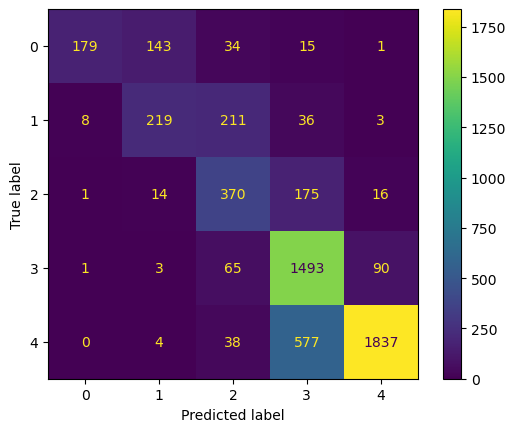

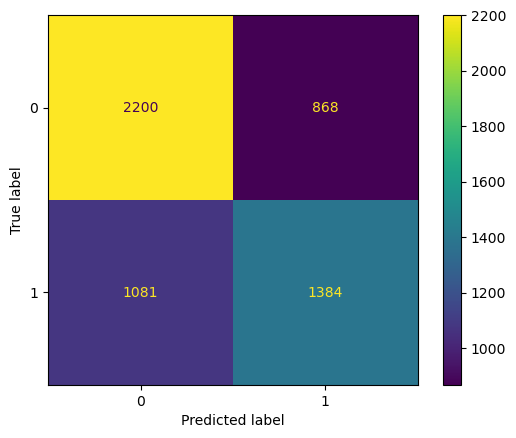

In [159]:
disp_W2V.plot()
plt.show()
disp_W2V_bad_fused.plot()
plt.show()

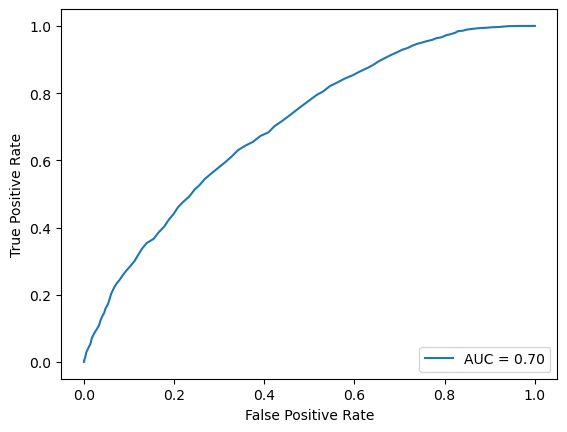

0.586813652745389


In [165]:
fpr, tpr, thresholds = roc_curve(y_W2V_true_bad_fused,y_W2V_pred_bad_fused)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()
f1 = f1_score(y_W2V_true_bad_fused,y_W2V_pred_bad_fused.round())
print(f1)

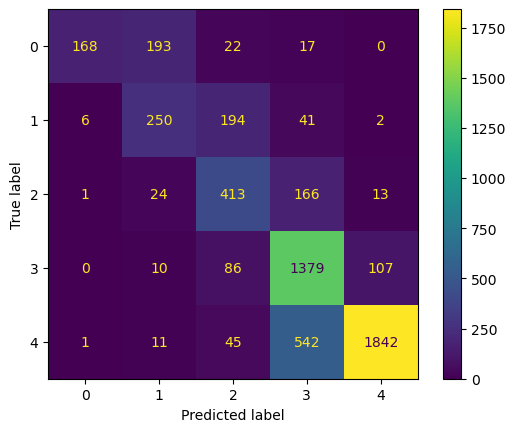

In [155]:
disp_FT.plot()
plt.show()

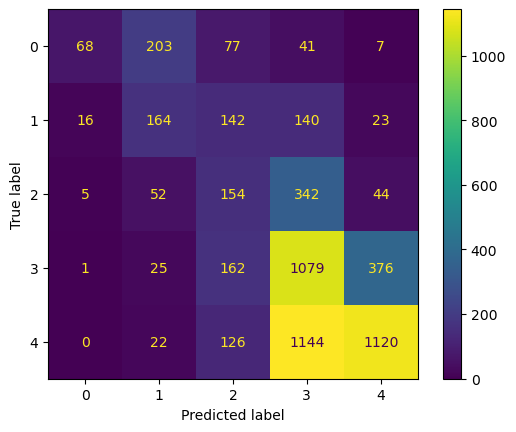

In [156]:
disp_TFIDF.plot()
plt.show()

In [157]:
with open("W2V_bad_fused.pkl", 'wb') as file:
    pickle.dump(best_randomForest_W2V_bad_fused, file)
with open("W2V.pkl", 'wb') as file:
    pickle.dump(best_randomForest_W2V, file)
with open("FT.pkl", 'wb') as file:
    pickle.dump(best_randomForest_FT, file)
with open("TFIDF.pkl", 'wb') as file:
    pickle.dump(best_randomForest_TFIDF, file)
with open("resTFIDF.pkl", 'wb') as file:
    pickle.dump(resTFIDF, file)